# Sentiment based Product Recommendation System Capstone Project
#####  Varun Mohite (Jan 2024 C61 - IIITB ML & AI)


<img src="[Designer (1)short.jpg](attachment:acb78af9-17d5-43b9-9e7f-978753bf81cd.jpg)" alt=" " align="left"
	width="150" height="150" />
Image Source: MS Copilot AI Generated image. CC.
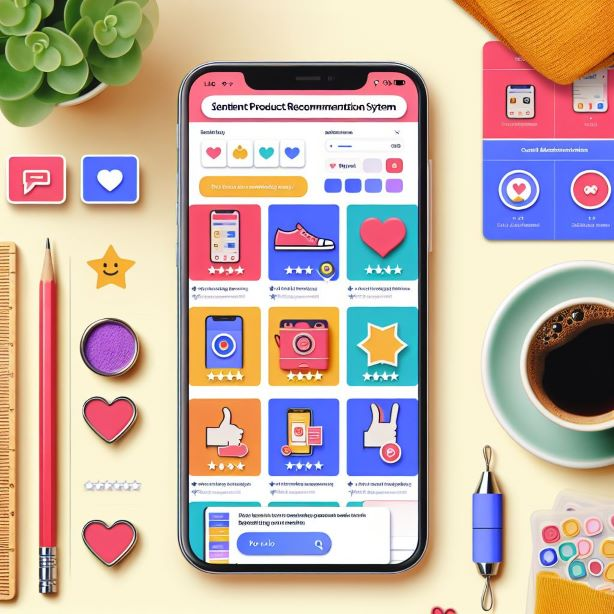


## Problem Statement

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

#### Data sourcing and sentiment analysis
Building a recommendation system
Improving the recommendations using the sentiment analysis model
Deploying the end-to-end project with a user interface

#### Data sourcing and sentiment analysis
In this task, you have to analyse product reviews after some text preprocessing steps and build an ML model to get the sentiments corresponding to the users' reviews and ratings for multiple products. 

## Tasks Performed:

#### 1. Exploratory Data Analysis (EDA)
1. Data Cleaning and Pre-Processing
2. Perform data quality checks and address data quality issues (missing value treatment)
3. Provide explanations for missing value removal or imputation
Drop irrelevant variables with explanations
Convert variables to correct datatypes

#### 2. Text Processing
1. Explore relevant text preprocessing steps
2. Provide reasons for each step in text preprocessing

#### 3. Feature Extraction
1. Divide data into training and testing sets
2. Convert text to features using the best-suited vectorizer (bag-of-words, TF-IDF, Word2Vec, etc.)

#### 4. Model Building
1. Build at least 3 ML models (Logistic Regression, Random Forest, XGBoost, Naive Bayes)
2. Perform comparative analysis of models
3. Handle class imbalance and perform hyperparameter tuning if necessary
4. Select the best model based on performance with detailed reasons

#### 5. Building the Recommendation System
1. Split data into train and test sets for recommendation system
2. Build user-based and item-based recommendation systems
3. Evaluate both types of recommendation systems and select one based on performance with detailed reasons

#### 6. Recommendation of Top 20 Products to a Specified User
* Recommend top 20 products for the username selected by the user based on the recommendation system built

#### 7. Fine-Tuning the Recommendation System and Recommendation of Top 5 Products
1. Predict sentiment of reviews in train set of top 20 recommended products for a user
2. Find percentage of positive sentiments for each product's reviews
3. Filter top 5 products with highest percentage of positive reviews

#### 8. Deployment Using Flask
1. Build an end-to-end web application using Flask and deploy it locally
2. Include one ML model and one recommendation system in deployment
3. Take username as input, create submit button, recommend 5 products based on entered username

Importing all necessary libraries - 

In [309]:
import re
import time
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)
pd.set_option("display.precision", 2)
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

# NLTK libraries:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

# Modelling 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MohitV24054\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MohitV24054\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\MohitV24054\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MohitV24054\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MohitV24054\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Package versions used in this project - 

In [386]:
import sklearn
import flask
import xgboost
#import gunicorn

print(sklearn.__version__)
print(np.__version__)
print(pd.__version__)
print(nltk.__version__)
print(flask.__version__)
print(xgboost.__version__)
#print(gunicorn.__version__)

ModuleNotFoundError: No module named 'gunicorn'

In [311]:
# importing dataset
df_reviews = pd.read_csv("C:\EPGP_AI&ML_Data\Recommendation System - CAPSTONE PROJECT\sample30.csv")
df_reviews.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


### Exploratory Data Analysis (EDA)

In [312]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [313]:
def calcMissingRowCount(df):
    # summing up the missing values (column-wise) and displaying fraction of NaNs
    return df.isnull().sum()

calcMissingRowCount(df_reviews)

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [314]:
# Remove the missing row of user_sentiment
df_reviews = df_reviews[~df_reviews.user_sentiment.isnull()]

In [315]:
# Mapping the categorical user_sentiment to numerical 1 or 0 for modelling
df_reviews['user_sentiment'] = df_reviews['user_sentiment'].map({'Positive':1,'Negative':0})

In [316]:
# Value count of user_sentiments column
df_reviews["user_sentiment"].value_counts(normalize=True)

user_sentiment
1    0.89
0    0.11
Name: proportion, dtype: float64

<Axes: xlabel='user_sentiment', ylabel='count'>

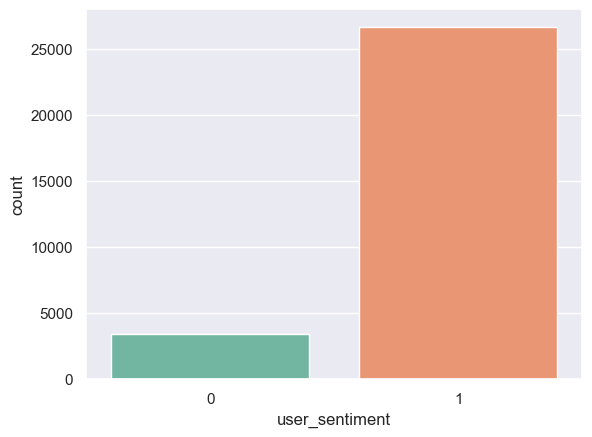

In [317]:
# Using count plot for simple visualization
sns.countplot(x='user_sentiment', data= df_reviews, palette="Set2")

We observe that there is an overrepresentation of positive reviews. We to do Class Imbalance techniques during modelling.

In [318]:
df_reviews["reviews_rating"].describe()

count    29999.00
mean         4.48
std          0.99
min          1.00
25%          4.00
50%          5.00
75%          5.00
max          5.00
Name: reviews_rating, dtype: float64

In [319]:
df_reviews["reviews_rating"].value_counts()

reviews_rating
5    20830
4     6020
1     1384
3     1345
2      420
Name: count, dtype: int64

<Axes: xlabel='reviews_rating', ylabel='count'>

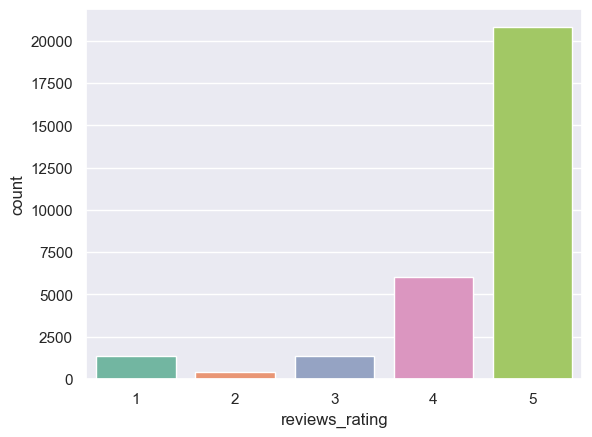

In [320]:
# Visualizing the "user_rating" using Countplot as per 5 star
sns.countplot(x='reviews_rating', data= df_reviews, palette="Set2")

In [321]:
# Get descriptive statistics for review ratings with POSITIVE sentiment
df_reviews[df_reviews["user_sentiment"]==1]["reviews_rating"].describe()

count    26632.00
mean         4.56
std          0.87
min          1.00
25%          4.00
50%          5.00
75%          5.00
max          5.00
Name: reviews_rating, dtype: float64

In [322]:
# Get descriptive statistics for review ratings with NEGATIVE sentiment
df_reviews[df_reviews["user_sentiment"]==0]["reviews_rating"].describe()

count    3367.00
mean        3.87
std         1.54
min         1.00
25%         3.00
50%         5.00
75%         5.00
max         5.00
Name: reviews_rating, dtype: float64

In [323]:
# Select titles, texts, and ratings of positive reviews with ratings below 4
df_reviews[(df_reviews["user_sentiment"]==1) & (df_reviews["reviews_rating"]<4)][["reviews_title","reviews_text", "reviews_rating"]]

,reviews_title,reviews_text,reviews_rating
9,Don't buy,Got as a surprise for my husband there is nothing special about it just a lube save the money and get plain KY if you just need a lube wish I could return it for a refund,1
11,Waste of Money,Purchased this thinking it would have some sort of warming effect but it's the same as the original. Don't waste your money.,1
14,Disappointed,First time purchase of this type of product. Maybe I expected too much. Did not think there was any warming feeling at all. Left us sticky! Even after trying to was it off.,1
18,Pretty nice,"I bought this because it had better reviews than the his and hers jelly, but I feel like it didn't work that well for us. It was kind of warm-feeling, but that's about it. I guess I don't know what's supposed to happen! Lol",3
54,New formula is terrible,"I used (and loved) this product for several years until they changed it. It used to moisturize my skin and left it feeling soft. Now, it sits on top of my skin and is never absorbed. It just leaves a slimy film on my skin. I will no longer purchase this product.",1
...,...,...,...
29050,Didn't Do Much For Dryness,"I received this product from Influenster. I absolutely love the whole system together, it made my hair oil-free for 48 hours. But I expected the conditioner to do more for the dryness at the ends of my hair like advertised. I didn't really notice much of a different in dryness before and after I...",3
29051,Not the best,"I used this product for a month straight before reviewing it and I'm not really all that impressed. My hair still gets pretty oily, my ends are still dry.... I mean it cleaned my hair I guess. It's nothing spectacular really. It didn't make my hair extremely soft but it didn't make my hair feel ...",3
29053,clay conditioning,Got this item as a compliment from influenster but it really made my hair smooth and shining after the usage. This review was collected as part of a promotion.,3
29054,Eh,"I am not in love with the conditioner. The clay mask and shampoo are GREAT but I didn't feel like this did anything for my ends. I would buy the other two, but not this, probably because I have fine hair and my ends need deep conditioning. Smells great though! I got this product free for testing...",3


In [324]:
# Select titles, texts, and ratings of negative reviews with ratings 4 or higher
df_reviews[(df_reviews["user_sentiment"]==0) & (df_reviews["reviews_rating"]>=4)][["reviews_title","reviews_text", "reviews_rating"]]

,reviews_title,reviews_text,reviews_rating
92,hydrating but not too heavy,It hydrates my skin. It is not too thick and heavy when I put it on. This review was collected as part of a promotion.,4
96,This product has made a real difference on my skin,In only a week I can see the difference in my skin on my face. This review was collected as part of a promotion.,4
100,Noticed a difference in just two weeks!,This product has made my skin smoother and supple after only two weeks. It absorbs well and leaves no residue. This review was collected as part of a promotion.,4
106,Very rich cream,"I like to use this cream on my neck and collarbone to help keep my skin well moisturized, but it can be a little heavy for the skin on my face This review was collected as part of a promotion.",4
117,Not greasy,"I finally found a moisturizing product that will absorb completely and not leave my skin feeling like it's suffocating. I apply it, and it feels like there is nothing there but my skin looks smoother. This review was collected as part of a promotion.",4
...,...,...,...
29818,Great Product,"I received a complimentary sample of this product and it worked so well for my hair! I have very thick hair so my roots always get oily and my ends are dry, this left my hair the cleanest it's felt in a long time. Will def recommend this to my family and friends! This review was collected as par...",5
29855,Great,This has prolonged the color in my hair! Not only is my hair healthier but I think I'll have to visit my stylist less! This review was collected as part of a promotion.,5
29858,Makes my hair soft and shiny without excess oil!,"This conditioner makes my hair very soft without weighing it down! I was afraid it'd make my roots more oily and weight them down, but it doesn't one bit! My hair is colored, and it hasn't faded out the color either! I'd highly recommend giving this a try! This review was collected as part of a ...",5
29862,Great Conditioner,This conditioner has become a staple in my hair regimen This review was collected as part of a promotion.,5


In [325]:
# Create a frequency table of user sentiment vs review ratings with totals
pd.crosstab(df_reviews["user_sentiment"], df_reviews["reviews_rating"], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,597,140,220,550,1860,3367
1,787,280,1125,5470,18970,26632
All,1384,420,1345,6020,20830,29999


This table helps you understand how user sentiment correlates with review ratings, which can be useful. As per the above results, there looks to be mismtach between review_rating and user_sentiment. 

##### Insights:
Positive sentiment reviews are significantly higher than negative sentiment reviews.
Most users with positive sentiment tend to give higher ratings (4 and 5).
Negative sentiment reviews are more evenly distributed across ratings, but still, the majority are higher ratings (4 and 5).

There are records that have higher user rating but user sentiment is negative and lower user rating but user sentiment is positive. We can either clean up those records or update the target column to the correct user sentiment, so that will be helpful for modelling. Here, updating the user_sentiment to 0 (but was 1) when the reviews_rating is less than 4, and updating the user_sentiment to 1(but was 0), when the reviews_rating is greater than or equal to 4

In [326]:
# Change user sentiment to negative for positive reviews with ratings below 4
df_reviews.loc[(df_reviews["user_sentiment"]==1) & (df_reviews["reviews_rating"]<4), "user_sentiment"] = 0

In [327]:
# Change user sentiment to positive for negative reviews with ratings 4 or higher
df_reviews.loc[(df_reviews["user_sentiment"]==0) & (df_reviews["reviews_rating"]>=4), "user_sentiment"] = 1

In [328]:
# Create a frequency table of user sentiment vs. review ratings with totals
pd.crosstab(df_reviews["user_sentiment"], df_reviews["reviews_rating"], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,1384,420,1345,0,0,3149
1,0,0,0,6020,20830,26850
All,1384,420,1345,6020,20830,29999


This above table shows a clear correlation between user sentiment and review ratings.

##### Insights:
All negative sentiment reviews are concentrated in the lower ratings (1, 2, and 3).
All positive sentiment reviews are concentrated in the higher ratings (4 and 5).
There are no negative sentiment reviews with ratings 4 and 5.
Positive sentiment reviews dominate the higher ratings, indicating that users with positive sentiment tend to give higher ratings.


In [329]:
# Count the occurrences of each user sentiment value
df_reviews["user_sentiment"].value_counts()

user_sentiment
1    26850
0     3149
Name: count, dtype: int64

In [330]:
# Count the occurrences of each brand value
df_reviews["brand"].value_counts()

brand
Clorox                   10585
Warner Home Video         3325
Disney                    1199
L'oreal Paris             1186
FOX                        887
                         ...  
Pacific Natural Foods        1
Noosa                        1
Southern Enterprises         1
SLOAN VALVE COMPANY          1
Universal Music              1
Name: count, Length: 214, dtype: int64

<Axes: xlabel='brand'>

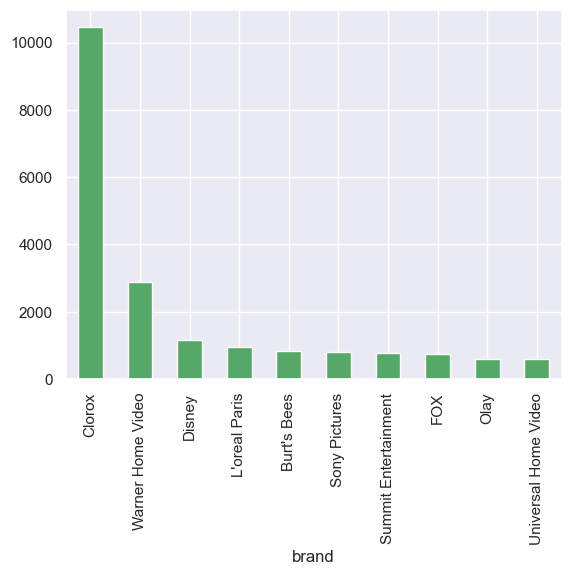

In [331]:
# Filter and plot a bar chart of the top 10 brands with the most positive reviews
df_reviews[df_reviews['user_sentiment']==1].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar',color='g')

<Axes: xlabel='brand'>

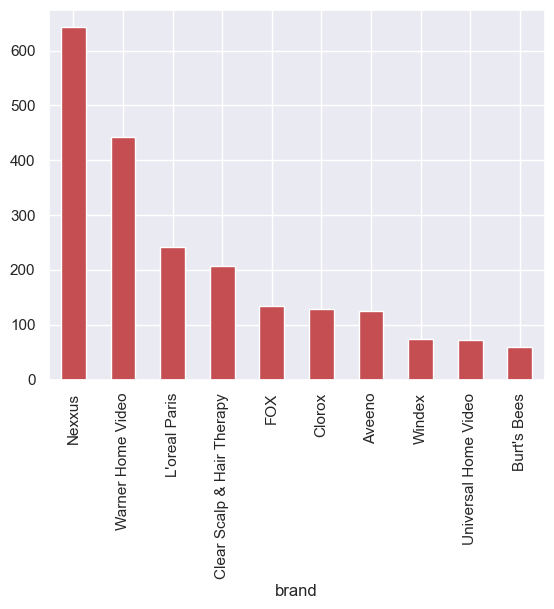

In [332]:
# Filter and plot a bar chart of the top 10 brands with the most negative reviews
df_reviews[df_reviews['user_sentiment']==0].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar', color='r')

In [333]:
# Count the number of positive or negative reviews for a given product
def filter_products(productId, pos=1):
    review_count = df_reviews[(df_reviews.id==productId) & (df_reviews.user_sentiment==pos)]['brand'].count()
    return review_count

In [334]:
# Create a DataFrame with total, positive, and negative review counts for each product
df_custom =  df_reviews.groupby('id', as_index=False)['user_sentiment'].count()
df_custom["pos_review_count"] =  df_custom.id.apply(lambda id: filter_products(id, 1))
df_custom["neg_review_count"] =  df_custom.id.apply(lambda id: filter_products(id, 0))

In [335]:
#Display first 10 rows
df_custom.head(10)

,id,user_sentiment,pos_review_count,neg_review_count
0,AV13O1A8GV-KLJ3akUyj,1,1,0
1,AV14LG0R-jtxr-f38QfS,2,2,0
2,AV16khLE-jtxr-f38VFn,27,10,17
3,AV1YGDqsGV-KLJ3adc-O,348,274,74
4,AV1YIch7GV-KLJ3addeG,1,1,0
5,AV1YlENIglJLPUi8IHsX,17,14,3
6,AV1YmBrdGV-KLJ3adewb,18,17,1
7,AV1YmDL9vKc47QAVgr7_,89,74,15
8,AV1Ymf_rglJLPUi8II2v,34,34,0
9,AV1Yn94nvKc47QAVgtst,25,24,1


In [336]:
# Calculate and sort the top 20 products by positive sentiment percentage
df_custom['sentiment %'] = np.round((df_custom['pos_review_count']/df_custom['user_sentiment'])*100,2)
df_custom.sort_values(by='sentiment %', ascending=False)[:20]

,id,user_sentiment,pos_review_count,neg_review_count,sentiment %
0,AV13O1A8GV-KLJ3akUyj,1,1,0,100.0
82,AVpf-lMV1cnluZ0-ub0_,4,4,0,100.0
138,AVpfE5UF1cnluZ0-dY1N,2,2,0,100.0
141,AVpfEqFbilAPnD_xUV28,4,4,0,100.0
143,AVpfErGsLJeJML431yRX,1,1,0,100.0
145,AVpfFGqP1cnluZ0-ddjG,1,1,0,100.0
149,AVpfGRUHilAPnD_xU5nU,5,5,0,100.0
150,AVpfGTRQLJeJML432WYA,8,8,0,100.0
151,AVpfG_ujilAPnD_xVI8L,8,8,0,100.0
153,AVpfH2Rx1cnluZ0-eYtu,3,3,0,100.0


In [337]:
# Count the occurrences of each manufacturer value
df_reviews["manufacturer"].value_counts()

manufacturer
Clorox                                8546
Test                                  3325
AmazonUs/CLOO7                        2039
L'oreal Paris                         1232
Walt Disney                           1142
                                      ... 
Pacific Foods of Oregon, Inc.            1
Unfi                                     1
Herr's                                   1
Southern Enterprises                     1
Universal Music Group / Cash Money       1
Name: count, Length: 227, dtype: int64

In [338]:
# Count the occurrences of the top 10 usernames in the reviews which are most common
df_reviews["reviews_username"].value_counts()[:10]

reviews_username
mike                 41
byamazon customer    41
chris                32
lisa                 16
sandy                15
tony                 15
rick                 15
dave                 14
john                 14
jojo                 13
Name: count, dtype: int64

<Axes: xlabel='reviews_username'>

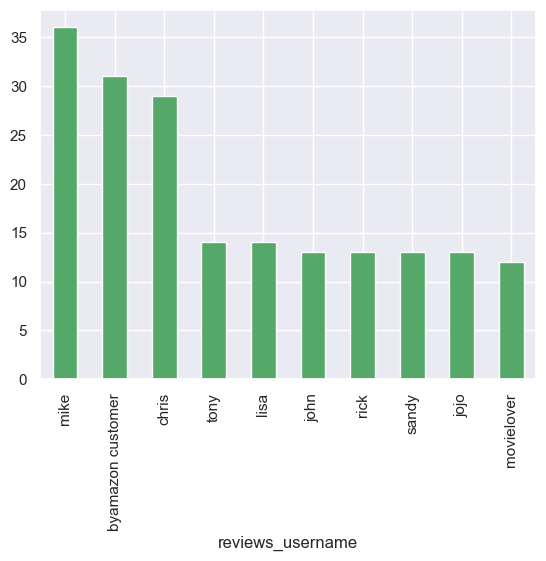

In [339]:
# Plot a bar chart of the top 10 usernames with the most positive reviews sentiment
df_reviews[df_reviews['user_sentiment']==1].groupby('reviews_username')['reviews_username'].count().sort_values(ascending=False)[:10].plot(kind='bar', color='g')

<Axes: xlabel='reviews_username'>

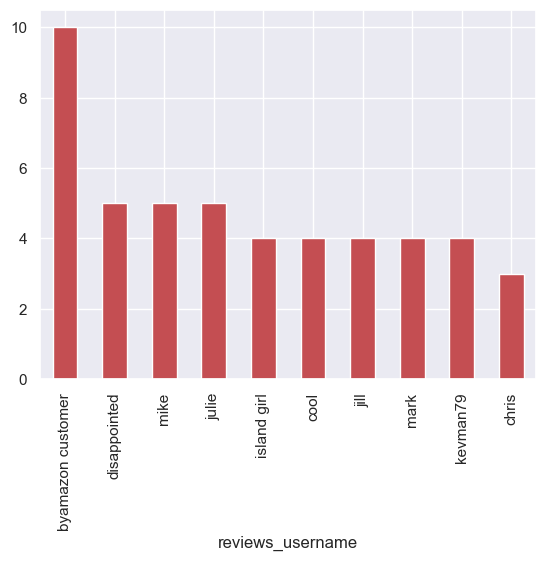

In [340]:
# Plot a bar chart of the top 10 usernames with the most negative reviews
df_reviews[df_reviews['user_sentiment']==0].groupby('reviews_username')['reviews_username'].count().sort_values(ascending=False)[:10].plot(kind='bar', color='r')

In [341]:
# Remove rows with NAN/null usernames from the reviews DataFrame
df_reviews = df_reviews[~df_reviews.reviews_username.isnull()]

In [342]:
# Fill null titles with empty strings and combine the reviews_text and reviews_title for better analysis
df_reviews["reviews_title"] = df_reviews["reviews_title"].fillna('')
df_reviews["reviews_full_text"] = df_reviews[['reviews_title', 'reviews_text']].agg('. '.join, axis=1).str.lstrip('. ')

In [343]:
# Calculate the number of missing rows in the reviews
calcMissingRowCount(df_reviews)

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               40
reviews_didPurchase     14005
reviews_doRecommend      2541
reviews_rating              0
reviews_text                0
reviews_title               0
reviews_userCity        28036
reviews_userProvince    29770
reviews_username            0
user_sentiment              0
reviews_full_text           0
dtype: int64

The columns for reviews_rating, reviews_text, user_sentiment & reviews_username doesn't have null/na values, which is a positive sign.

### Text Preprocessing for Modelling

In [344]:
#import string
#import nltk
#nltk.download('punkt_tab')

In [345]:
# Randomly sample 10 rows of full review text and user sentiment
df_reviews[["reviews_full_text", "user_sentiment"]].sample(10)

,reviews_full_text,user_sentiment
3409,Awesome New products. Loving the new products. You should see for yourself. There's something for everyone. The age defy leaves my hair soft and manageable and it smells great too This review was collected as part of a promotion.,1
5409,It Is Nearly Natural. Another Nearly Natural product that looks life-like. Works perfectly in our living room setting. This review was collected as part of a promotion. This review was collected as part of a promotion.,1
20796,"IfAManAnswers. Clean, funny and family friendly.",1
8521,Love This Product!. I use these in just about every room in the house! Love them!,1
24662,"My favorite monster. Poor Godzilla! Loved him ever since I saw the original Japanese made film from the 50's. Other Godzilla movies were stupid, but this one gives the monster his due. True, it's all about special effects, as most films are nowadays, but the story line is good and Godzilla has s...",1
24382,Just a typical Godzilla movie. I wasn't too impressed with this one. Special effects were decent but it really wasn't much different from all the other Godzilla movies I've seen. If you're a Godzilla fan you may like it.,1
18199,90's classic with a ton of special features. This is classic 90's comedic gold. You know it you love it. The transfer is just ok but the special features are abundant and hilarious. A worthy addition to your library.,1
25179,great. way better than the originals..everyone should enjoy it,1
28639,Great Glider!. This product is wonderful! Much more practical than those super pricy gliders that look and glide the same as this budget friendly chair. Assembly is quick and easy. Glides smoothly and is very comfortable to sit in. Wood is beautiful espresso brown color and cushions are a great ...,1
4931,"Pretty good for a video game movie. I had played the original RE but never cared to watch the movies. After one day seeing part of the fifth one, and after having bought the re release of the remastered RE, I decided to give the movies a shot. They pretty much met my expectations of a video game...",1


In [346]:
# Function to clean text by removing punctuation, numbers, and unnecessary elements

def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub("\[\s*\w*\s*\]", "", text)
    dictionary = "abc".maketrans('', '', string.punctuation)
    text = text.translate(dictionary)
    text = re.sub("\S*\d\S*", "", text)
    
    return text

In [347]:
df_clean = df_reviews[['id','name', 'reviews_full_text', 'user_sentiment']]

In [348]:
# Apply the clean_text function to the full review text
df_clean["reviews_text"] = df_clean.reviews_full_text.apply(lambda x: clean_text(x))

In [349]:
# Map POS tag to WordNet POS using below helper function (default to NOUN if no matchfound)
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [350]:
# Removes English stopwords from the given text

stop_words = set(stopwords.words('english'))

def remove_stopword(text):
    words = [word for word in text.split() if word.isalpha() and word not in stop_words]
    return " ".join(words)

In [351]:
# Lemmatize the given textr based on word position tags.

lemmatizer = WordNetLemmatizer()
# Lemmatize the sentence
def lemma_text(text):
    word_pos_tags = nltk.pos_tag(word_tokenize(remove_stopword(text))) # Get position tags
    # Map the position tag and lemmatize the word/token
    words =[lemmatizer.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] 
    return " ".join(words)

In [352]:
# Clean and lemmatize the review text
df_clean["reviews_text_cleaned"] = df_clean.reviews_text.apply(lambda x: lemma_text(x))

In [353]:
df_clean.head()

,id,name,reviews_full_text,user_sentiment,reviews_text,reviews_text_cleaned
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,1,just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it rating all the way her metaphors are just crazy,awesome love album good hip hop side current pop sound hype listen everyday gym give rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor. This review was collected as part of a promotion.,1,good good flavor this review was collected as part of a promotion,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor.,1,good good flavor,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed. I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation...",0,disappointed i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what w...,disappoint read review look buy one couple lubricant ultimately disappointed didnt even live review read starter neither boyfriend could notice sort enhanced captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation. My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,0,irritation my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel,irritation husband buy gel u gel caused irritation felt like burn skin wouldnt recommend gel


I wanted to represent the word frequency in a Word cloud. Installed the package
#!pip install wordcloud

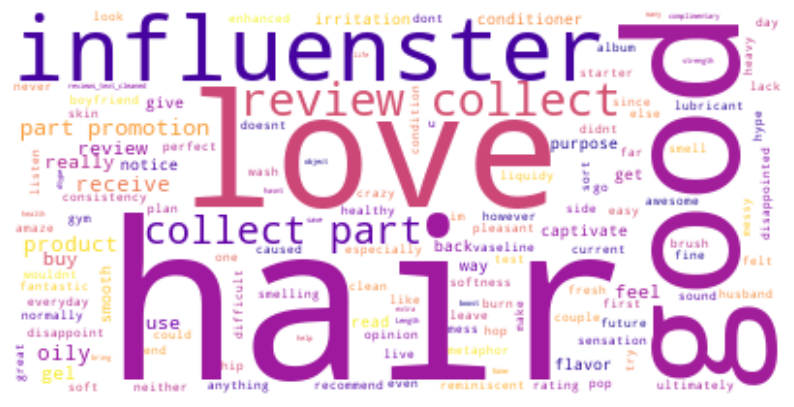

In [374]:
# Generate and display a Word cloud to find the top 40 words by frequency among all the articles from the cleaned review text
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud with a specific colormap
wordcloud = WordCloud(background_color="white", stopwords=stop_words, max_words=200, colormap='plasma').generate(str(df_clean.reviews_text_cleaned))

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

(array([1.0622e+04, 1.2187e+04, 3.9170e+03, 1.5600e+03, 7.5600e+02,
        3.1200e+02, 2.3100e+02, 1.1900e+02, 6.7000e+01, 4.2000e+01,
        3.5000e+01, 3.4000e+01, 1.2000e+01, 3.0000e+00, 1.0000e+01,
        3.0000e+00, 4.0000e+00, 2.0000e+00, 3.0000e+00, 5.0000e+00,
        5.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([3.00000e+00, 7.68400e+01, 1.50680e+02, 2.24520e+02, 2.98360e+02,
        3.72200e+02, 4.46040e+02, 5.19880e+02, 5.93720e+02, 6.67560e+02,
        7.41400e+02, 8.15240e+02, 8.89080e+02, 9.62920e+02, 1.03676e+03,
        1.11060e+03, 1.18444e+03, 1.25828e+03, 1.33212e+03, 1.40596e+03,
        1.47980e+03, 1.553

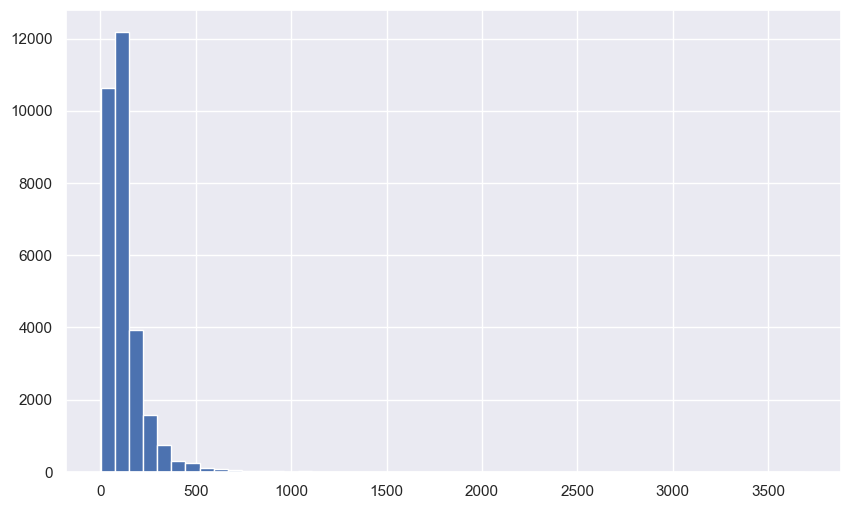

In [355]:
# Plot a histogram of the lengths of cleaned review texts.

plt.figure(figsize=(10,6))
reviews_lens = [len(d) for d in df_clean.reviews_text_cleaned]
plt.hist(reviews_lens, bins = 50)

In [356]:
# Get most common words from the reviews, excluding punctuation marks.
def getMostCommonWords(reviews, n_most_common):
    # flatten review column into a list of words, and set each to lowercase
    flattened_reviews = [word for review in reviews for word in \
                         review.lower().split()]


    # remove punctuation from reviews
    flattened_reviews = [''.join(char for char in review if \
                                 char not in string.punctuation) for \
                         review in flattened_reviews]


    # remove any empty strings that were created by this process
    flattened_reviews = [review for review in flattened_reviews if review]

    return Counter(flattened_reviews).most_common(n_most_common)

In [357]:
# Get the 10 most common words from positive reviews

pos_reviews = df_clean[df_clean['user_sentiment']==1]
getMostCommonWords(pos_reviews['reviews_text_cleaned'],10)

[('great', 14397),
 ('love', 12429),
 ('use', 11725),
 ('product', 10805),
 ('movie', 9855),
 ('review', 8881),
 ('part', 8728),
 ('promotion', 8374),
 ('wipe', 8189),
 ('clean', 8075)]

In [358]:
# Get the 10 most common words from negative reviews

neg_reviews = df_clean[df_clean['user_sentiment']==0]
getMostCommonWords(neg_reviews['reviews_text_cleaned'],10)

[('product', 1934),
 ('use', 1794),
 ('hair', 1575),
 ('formula', 1439),
 ('new', 1261),
 ('like', 1090),
 ('old', 1078),
 ('good', 1075),
 ('movie', 1033),
 ('gel', 876)]

In [359]:
# Get the top n n-grams qord frequency from the corpus

def get_top_n_ngram( corpus, n_gram_range ,n=None):
    vec = CountVectorizer(ngram_range=(n_gram_range, n_gram_range), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    #print(bag_of_words)
    sum_words = bag_of_words.sum(axis=0) 
    print("--1",sum_words)
    for word, idx in vec.vocabulary_.items():
        #print(word)
        #print(idx)
        break
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    #print("-31",words_freq)
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [360]:
# Get the top 10 most common bigrams from POSITIVE reviews and convert to DataFrame
common_words = get_top_n_ngram(pos_reviews['reviews_text_cleaned'], 2, 10)
pd.DataFrame(common_words)

--1 [[1 1 1 ... 1 1 1]]


,0,1
0,review collect,7920
1,collect promotion,7920
2,clorox wipe,2803
3,great product,1944
4,great movie,1739
5,easy use,1554
6,love clorox,1223
7,love product,1137
8,use clorox,1088
9,good movie,922


In [361]:
# Get the top 10 most common bigrams from NEGATIVE reviews and convert to DataFrame
common_words = get_top_n_ngram(neg_reviews['reviews_text_cleaned'], 2, 10)
pd.DataFrame(common_words)

--1 [[1 1 1 ... 1 1 2]]


,0,1
0,new formula,520
1,old formula,515
2,bring old,369
3,review collect,346
4,collect promotion,346
5,exxtra gel,205
6,use product,183
7,make hair,157
8,shampoo conditioner,147
9,gel year,127


--1 [[1 1 1 ... 1 1 2]]


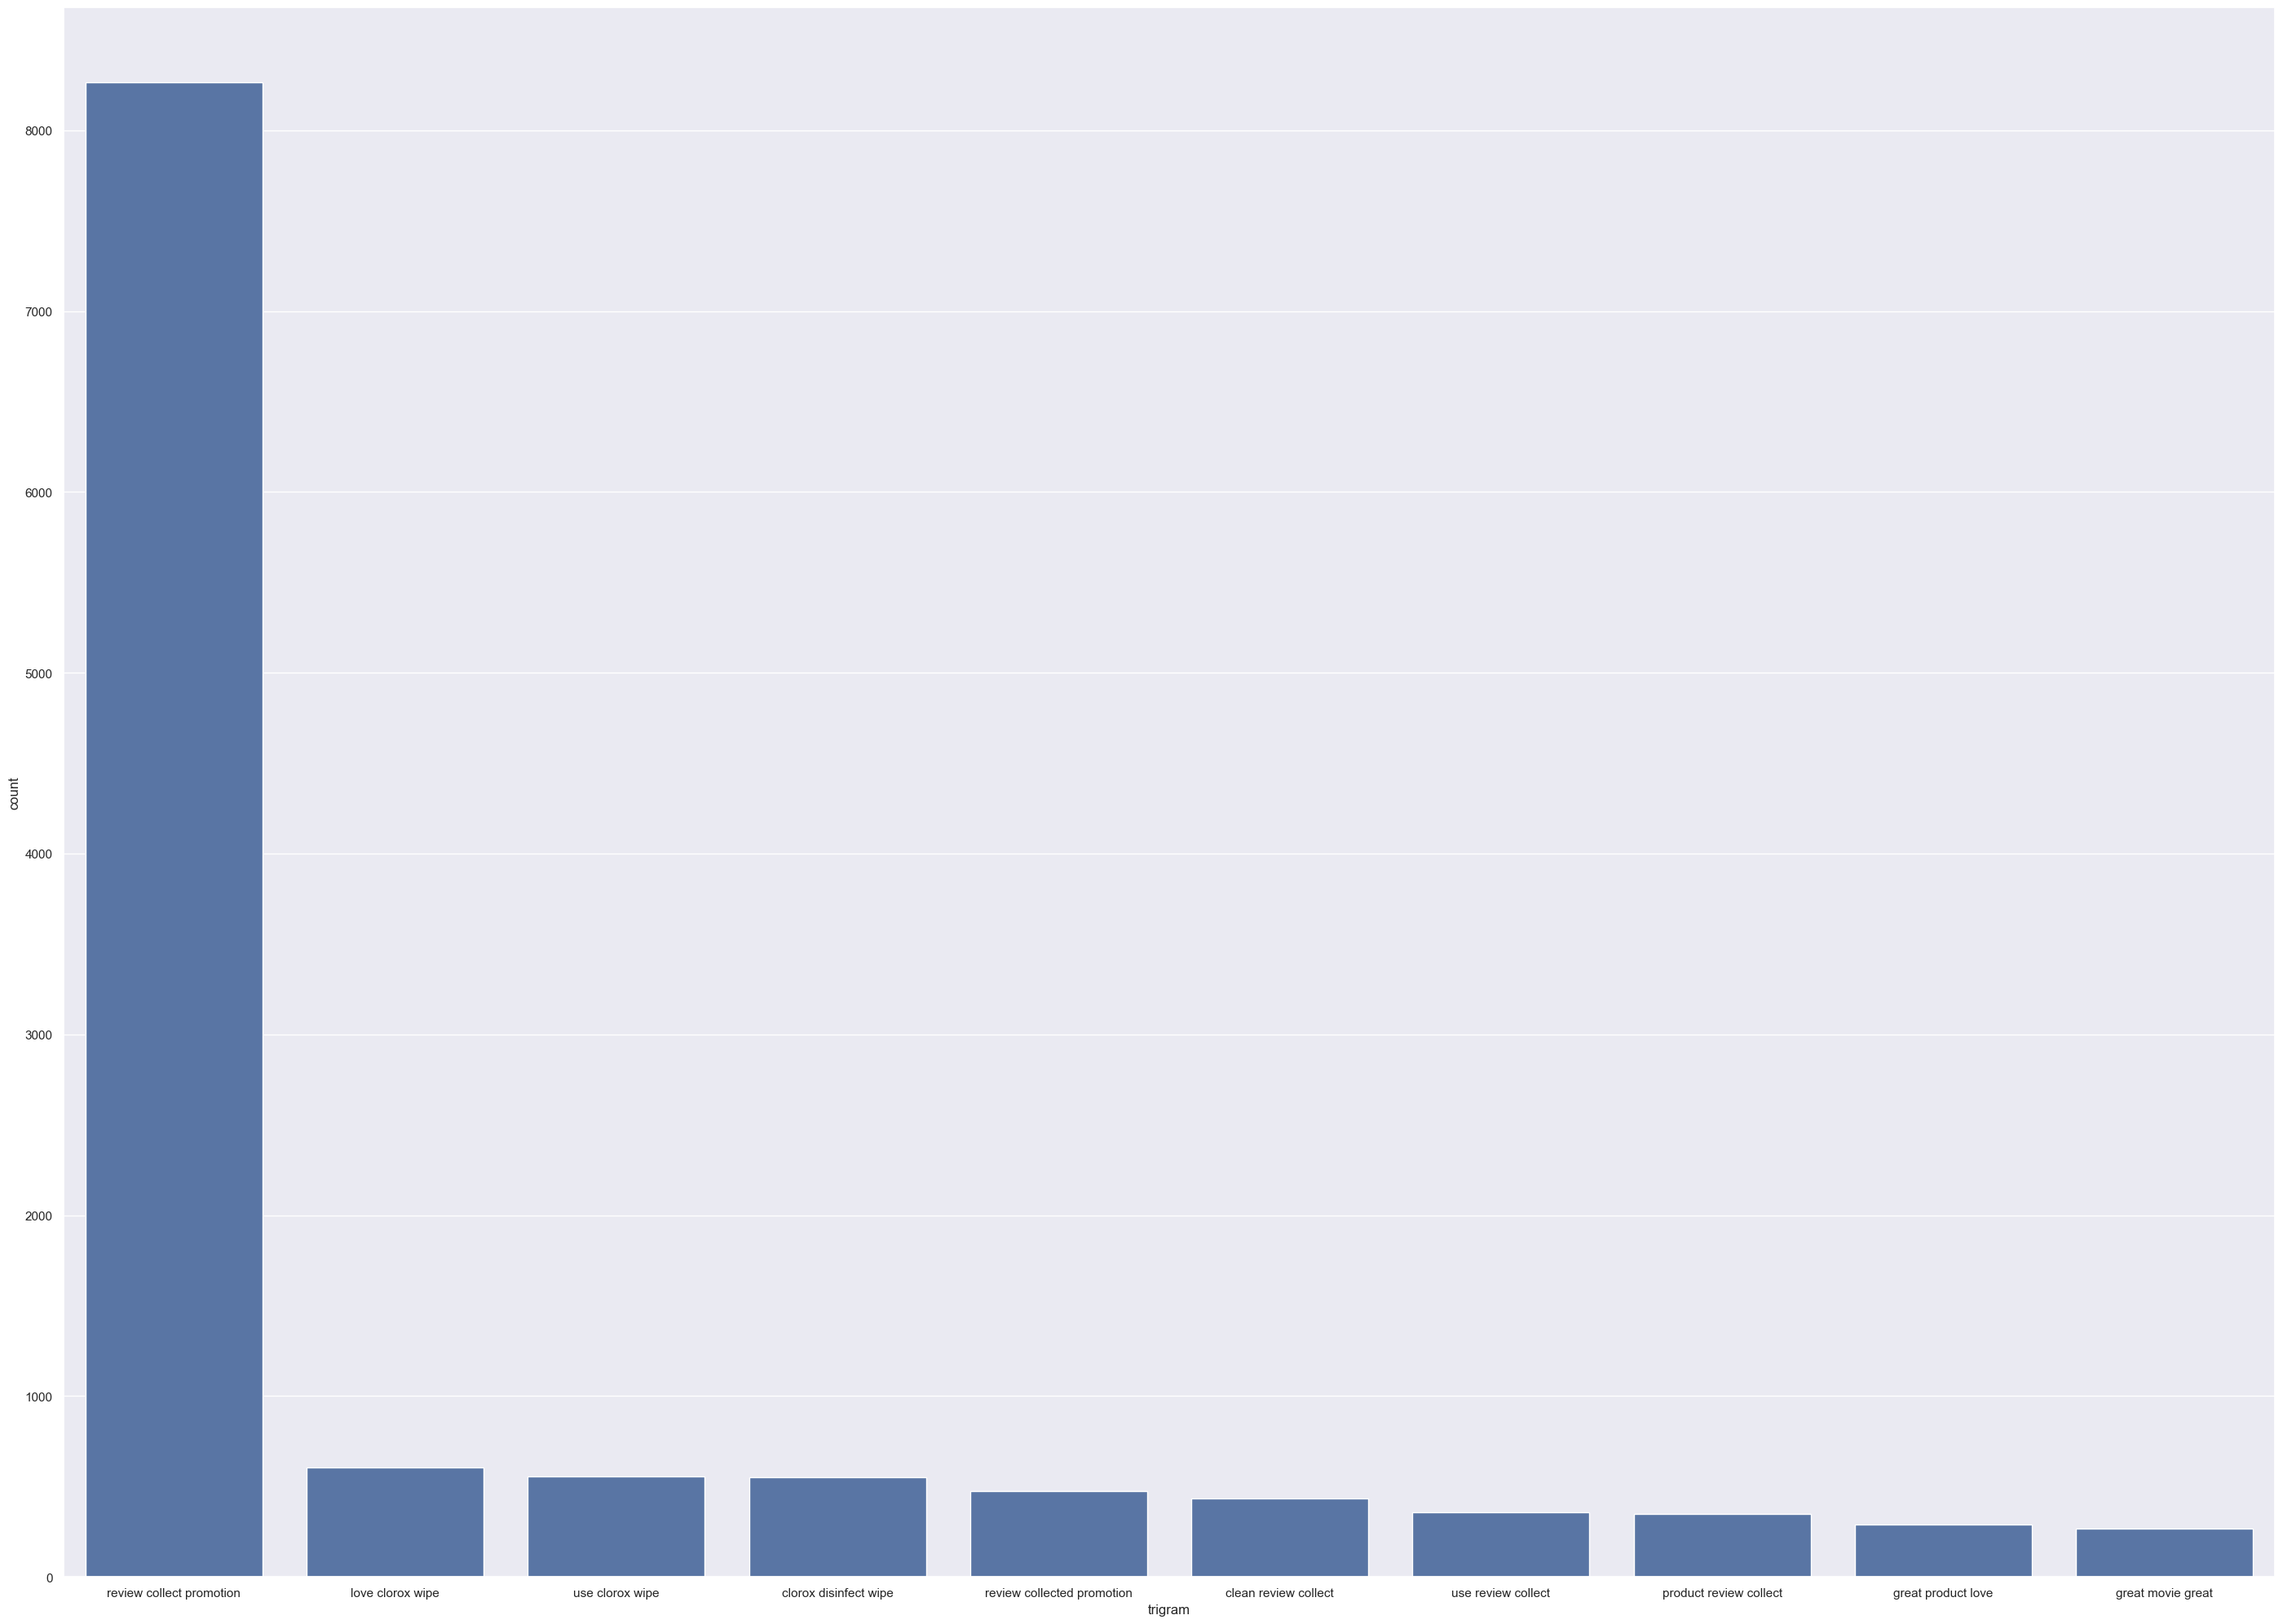

In [362]:
# Get the top 10 most common trigrams from the cleaned review text and plot a bar chart
common_words = get_top_n_ngram(df_clean.reviews_text_cleaned, 3, 10)
df3 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
plt.figure(figsize=[35,25])
fig = sns.barplot(x=df3['trigram'], y=df3['count'])

In [363]:
# Define features (X) and target (y) for the model

X = df_clean['reviews_text_cleaned']
y = df_clean['user_sentiment']

### Feature Extraction

In [364]:
# Get the number of unique classes in the target variable
no_of_classes= len(pd.Series(y).value_counts())

In [365]:
# Display the percentage of each class in the target variable data in terms of proportions

for i in range(0,no_of_classes):
    print("Percent of {0}s: ".format(i), round(100*pd.Series(y).value_counts()[i]/pd.Series(y).value_counts().sum(),2), "%")

Percent of 0s:  10.47 %
Percent of 1s:  89.53 %


To Vectorize the data, using TF-IDF vectorizer method to dervie the features from the textual data

As it's clearly a class-imbalance between positive and negative, let's do SMOTE oversampling technique before modelling

In [366]:
# Vectorize the cleaned review text using TF-IDF and define the target variable and get 650 features

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=650, max_df=0.9, min_df=7, binary=True, 
                                   ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(df_clean['reviews_text_cleaned'])

y= df_clean['user_sentiment']

In [367]:
# Print the feature names from the TF-IDF vectorizer
print(tfidf_vectorizer.get_feature_names_out())

['able' 'absolutely' 'absolutely love' 'act' 'action' 'action movie'
 'actor' 'actually' 'add' 'age' 'ago' 'amaze' 'amazing' 'apply' 'area'
 'ask' 'available' 'away' 'awesome' 'awesome movie' 'awesome product'
 'awful' 'baby' 'bad' 'bag' 'bathroom' 'bathroom kitchen' 'beautiful'
 'bee' 'begin' 'believe' 'best' 'best buy' 'best product' 'big' 'bit'
 'black' 'bleach' 'blu' 'blu ray' 'bluray' 'body' 'bottle' 'box' 'boy'
 'brand' 'break' 'bring' 'bring cocoa' 'bring old' 'brown' 'burt'
 'burt bee' 'buy' 'canister' 'car' 'care' 'carpet' 'carry' 'cast' 'cd'
 'chair' 'change' 'character' 'cheap' 'child' 'chip' 'classic' 'classroom'
 'clay' 'clean' 'clean bathroom' 'clean disinfect' 'clean easy'
 'clean fresh' 'clean great' 'clean kitchen' 'clean love' 'clean mess'
 'clean product' 'clean review' 'clean smell' 'clean ups' 'clean use'
 'clean wipe' 'cleaner' 'cleaning' 'cleanup' 'clear' 'clorox'
 'clorox disinfect' 'clorox love' 'clorox product' 'clorox wipe' 'close'
 'cocoa' 'cold' 'collect' '

In [368]:
# Split the data into training and testing sets
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, random_state=42, test_size=0.25)

In [369]:
# Balance the dataset using SMOTE
counter = Counter(y_train)
print('Before',counter)

sm = SMOTE()


# Transform the dataset
X_train, y_train = sm.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('After',counter)

Before Counter({1: 20087, 0: 2365})
After Counter({1: 20087, 0: 20087})


### Model Building

In [370]:
import time
#from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
import pickle

In [371]:
# Class to build, train, and evaluate a machine learning model, including metrics-
# evaluation, classification report, confusion matrix, and ROC curve plotting.

class ModelBuilder:
    def __init__(self, model, x_train, x_test, y_train, y_test):
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        
        
    def train_model(self):
        self.model.fit(self.x_train,self.y_train)
        return self.model.predict(self.x_test)
    
    def evaluate_model(self, y_pred_class):
        print("\n")
        print("*"*30)
        self.result_metrics = self.evaluate_metrics(y_pred_class)
        print("*"*30)
        print("\n")
        
        self.classification_report(y_pred_class)
        print("*"*30)
        print("\n")
        self.confusion_matrix(y_pred_class)
            
        print("*"*30)
        print("\n")
        
        #metrics.plot_roc_curve(self.model, self.x_test, self.y_test)
        RocCurveDisplay.from_estimator(self.model, self.x_test, self.y_test)
        
        return self.result_metrics
        
    def evaluate_metrics(self, y_pred_class):
        result_metrics = [] 
        accuracy = metrics.accuracy_score(self.y_test, y_pred_class)
        precision = metrics.precision_score(self.y_test, y_pred_class)
        recall = metrics.recall_score(self.y_test, y_pred_class)
        f1score = metrics.f1_score(self.y_test, y_pred_class)
        y_pred_prob = self.model.predict_proba(self.x_test)[:,1]
        roc_auc = metrics.roc_auc_score(self.y_test, y_pred_prob)
        
        print(f"Accuracy is : {accuracy*100:.1f}%")
        print(f"Precision is : {precision*100:.1f}%")
        print(f"Recall is : {recall*100:.1f}%")
        print(f"F1 Score is : {f1score*100:.1f}%")
        print(f"Roc-Auc Score is:{roc_auc*100:.1f}%")
        
        result_metrics.append(accuracy)
        result_metrics.append(precision)
        result_metrics.append(recall)
        result_metrics.append(f1score)
        result_metrics.append(roc_auc)
        return result_metrics
        
    def confusion_matrix(self, y_pred_class):
        confusion_matrix = metrics.confusion_matrix(self.y_test, y_pred_class)
        self.plot_confusion_matrix(confusion_matrix,[0,1])
        
        
    def plot_confusion_matrix(self, data, labels):
        sns.set(color_codes=True)
        plt.title("Confusion Matrix")
        ax = sns.heatmap(data/np.sum(data), annot=True, cmap="Blues", fmt=".2%")
 
        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)
 
        ax.set(ylabel="True Values", xlabel="Predicted Values")
        plt.show()
        
    def classification_report(self, y_pred_class):
        print(metrics.classification_report(self.y_test, y_pred_class))


F1-score/recall score for class 0 is low and this could be due to class-imbalance, though the other metrics seem to be good. Let's use class-imbalance techniques using SMOTE and do the modelling.

### Logistic Regression

In [372]:
# Build the Logistic Regression model

%time
logreg_ci = LogisticRegression(random_state=42, max_iter=100,solver='liblinear', class_weight="balanced")
lr_ci_modebuilder = ModelBuilder(logreg_ci, X_train, X_test, y_train, y_test)

CPU times: total: 0 ns
Wall time: 0 ns




******************************
Accuracy is : 88.3%
Precision is : 96.6%
Recall is : 90.1%
F1 Score is : 93.3%
Roc-Auc Score is:90.0%
******************************


              precision    recall  f1-score   support

           0       0.46      0.72      0.56       770
           1       0.97      0.90      0.93      6714

    accuracy                           0.88      7484
   macro avg       0.71      0.81      0.75      7484
weighted avg       0.91      0.88      0.89      7484

******************************




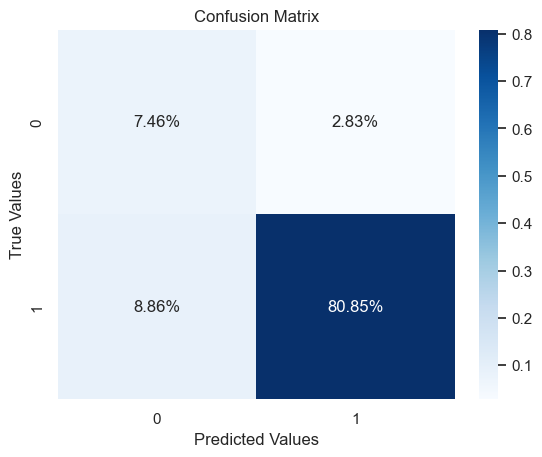

******************************




NameError: name 'self' is not defined

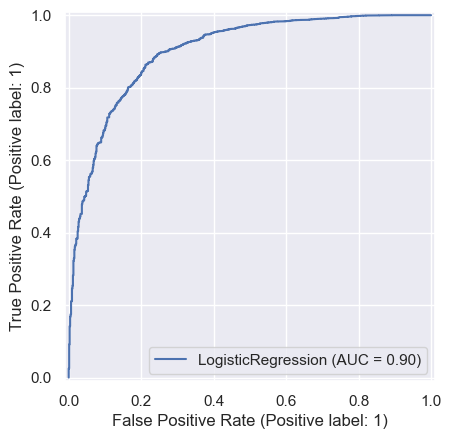

In [373]:
# Train the logistic regression model and evaluate its performance using various metrics

y_pred_class  = lr_ci_modebuilder.train_model()
lr_metrics = lr_ci_modebuilder.evaluate_model(y_pred_class)

# Replace metrics.plot_roc_curve with RocCurveDisplay
RocCurveDisplay.from_estimator(self.model, self.x_test, self.y_test)

The calculated F1 Score looks good, although the individual class(0) is lesser. If we try with other alogithms we can increase the overall F1 and for the individual classes.

### Naive Bayes

In [ ]:
# Import the Multinomial Naive Bayes classifier to make predictions
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Now we initialize the Naive Bayes classifier with alpha=1 and create a ModelBuilder instance using the classifier and the training/testing data

mnb = MultinomialNB(alpha=1.0)
mnb_modebuilder = ModelBuilder(mnb, X_train, X_test, y_train, y_test)

In [ ]:
# Training and evaluating its performance
y_pred_class  = mnb_modebuilder.train_model()
nb_metrics = mnb_modebuilder.evaluate_model(y_pred_class)

### Decision Tree

In [ ]:
# Here we perform hyperparameter tuning and initialize a Decision Tree classifier with specified parameters

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=10)

In [ ]:
# Trainging and testing the model to evaluate performance

dt_modelbuilder = ModelBuilder(dt, X_train, X_test, y_train, y_test)

y_pred_class  = dt_modelbuilder.train_model()
dt_metrics_cv = dt_modelbuilder.evaluate_model(y_pred_class)

### Random Forest classifier

In [ ]:
# Initialize Random Forest classifier with out-of-bag score enabled and definig hyperparameter for tuning the classifier
rf = RandomForestClassifier(oob_score=True, random_state=42, criterion="gini")

In [ ]:
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [10, 25, 50, 100]
}

In [ ]:
# Setting up grid search to find best settings using cross-validation
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="f1")

In [ ]:
# Measure the time taken to fit the grid search model on training data

%time
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best RandomForestClassifier from the grid search
rf_best = grid_search.best_estimator_
rf_modebuilder = ModelBuilder(rf_best, X_train, X_test, y_train, y_test)

In [ ]:
# Train and Predict the Test Labels
y_pred_class  = rf_modebuilder.train_model()
rf_metrics = rf_modebuilder.evaluate_model(y_pred_class)

### XGBoost Classifier

In [ ]:
# Initialize an XGBoost classifier
!pip  install xgboost
import xgboost as xgb

xgclf = xgb.XGBClassifier(learning_rate=0.15, max_depth=10, random_state=42) #based on the tuned parameters
xg_modebuilder = ModelBuilder(xgclf, X_train, X_test, y_train, y_test)

In [ ]:
# Train and Predict the Test Labels
y_pred_class  = xg_modebuilder.train_model()
xg_metrics = xg_modebuilder.evaluate_model(y_pred_class)

### Model Inference

In [ ]:
# Evaluate XGBoost model performance
xg_metrics

In [ ]:
# Creating a table which contain all the metrics

metrics_table = {'Metric': ['Accuracy','Precision','Recall',
                       'F1Score','Auc Score'], 
        'Logistic Regression': lr_metrics,
        'Naive Bayes': nb_metrics,
        'Decision Tree': dt_metrics_cv,
         'Random Forrest': rf_metrics,
        'XG Boost': xg_metrics
        }

df_metrics = pd.DataFrame(metrics_table ,columns = ['Metric', 'Logistic Regression', 'Naive Bayes','Decision Tree','Random Forrest',
                                                    'XG Boost'] )

df_metrics


In the table above, we compare the models on their metrics. XGBoost clearly is a better model as compared to the others. Saving the XGBoost model as a pickle file for later use.

#### Saving the model

In [ ]:
import os
import pickle

# Save the given object to a file in the 'pickle' directory with a .pkl extension
def save_object(obj, filename):
    directory = "pickle"
    if not os.path.exists(directory):
        os.makedirs(directory)
    filepath = os.path.join(directory, filename + '.pkl')
    pickle.dump(obj, open(filepath, 'wb'))



In [ ]:
save_object(xgclf, 'sentiment-classification-xg-boost-model')

In [ ]:
save_object(tfidf_vectorizer, 'tfidf-vectorizer')

In [ ]:
save_object(df_clean, 'cleaned-data')

## Recommendation System

Now we explore different approaches to develop the Recommendation System -

We will focus on two collaborative filtering techniques:

1. User-User Based Approach
2. Item-Item Based Approach

In [ ]:
df_reviews.info()

In [ ]:
#Create another dataframe to calculate number of missing values in it
df_recommendation = df_reviews[["id", "name", "reviews_rating", "reviews_username"]]
calcMissingRowCount(df_recommendation)

In [ ]:
# Split the data set into train and test set
train, test = train_test_split(df_recommendation, test_size=0.25, random_state=42)

In [ ]:
print(train.shape)
print(test.shape)

In [ ]:
product_column = "id"
user_column = "reviews_username"
value_column = "reviews_rating"

In [ ]:
# Transform the training ratings dataset into a matrix with products as columns and users as rows, filling missing values with 0
df_pivot = pd.pivot_table(train,index=user_column, columns = product_column, values = value_column).fillna(0)
df_pivot.head(10)

### Creating dummy train and test

In [ ]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [ ]:
dummy_train.head()

In [ ]:
# Mark unrated products as 1 for prediction
dummy_train[value_column] = dummy_train[value_column].apply(lambda x: 0 if x>=1 else 1)

In [ ]:
# Pivot the train ratings dataset into matrix format where columns are product names and the rows are user names
dummy_train = pd.pivot_table(dummy_train,index=user_column, columns = product_column, values = value_column).fillna(1)
dummy_train.head(10)

### User similarity matrix

In [ ]:
df_pivot.index.nunique()

In [ ]:
# Importing necessary functions
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity

In [ ]:
# Compute user similarity using cosine similarity (distance) and handle NaN values

user_correlation = cosine_similarity(df_pivot)
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)
print(user_correlation.shape)

### Prediction User-User

In [ ]:
#filtering out the user_correlation that are negatively correlated and se tto zero
user_correlation[user_correlation<0]=0
user_correlation

In [ ]:
# Predict user ratings by multiplying user correlation matrix with ratings matrix
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

In [ ]:
# As we are interested in products that are not rated by the user, we multiply with dummy train to make it zero
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

### Find 20 recommendation for the user

In [ ]:
user_input = "08dallas" 
print(user_input)

In [ ]:
# Get top 20 product recommendations for the user
recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
recommendations

In [ ]:
# Display top 20 product IDs, names, and similarity scores
final_recommendations = pd.DataFrame({'product_id': recommendations.index, 'similarity_score': recommendations})
final_recommendations.reset_index(drop=True)
pd.merge(final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

### Evaluation User-User

In [ ]:
# Identify common users in test and train datasets
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

In [ ]:
common.head()

In [ ]:
# Convert common users' data into a user-product matrix
common_user_based_matrix = pd.pivot_table(common, index=user_column, columns=product_column, values=value_column)
common_user_based_matrix.head()

In [ ]:
# Converting the user correlation matrix to a data frame
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

In [ ]:
# Add the user identifiers to the correlation data frame and set as index
user_correlation_df[user_column] = df_pivot.index
user_correlation_df.set_index(user_column, inplace=True)
user_correlation_df.head()

In [ ]:
# Filter user correlation data frame for common users
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df_1 = user_correlation_df[user_correlation_df.index.isin(list_name)]

In [ ]:
user_correlation_df_1.shape

In [ ]:
# Calculate the transpose and filter user correlation data frame for common users
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [ ]:
# Transpose the filtered user correlation data frame back to original
user_correlation_df_3 = user_correlation_df_2.T

In [ ]:
# Set negative correlations to zero and predict ratings for common users
user_correlation_df_3[user_correlation_df_3 < 0] = 0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

In [ ]:
# Prepare test dataset by marking rated products and converting to matrix format
dummy_test = common.copy()

dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x >= 1 else 0)
dummy_test = pd.pivot_table(dummy_test, index=user_column, columns=product_column, values=value_column).fillna(0)

In [ ]:
dummy_test.shape

In [ ]:
common_user_based_matrix.head()

In [ ]:
dummy_test.head()

In [ ]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [ ]:
common_user_predicted_ratings.head()

In [ ]:
# Scale predicted ratings to range 1-5 using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X = common_user_predicted_ratings.copy()
X = X[X > 0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = scaler.transform(X)

print(y)

In [ ]:
# Convert common users' data into a user-product matrix
common_ = pd.pivot_table(common, index=user_column, columns=product_column, values=value_column)

In [ ]:
# Finding out total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [ ]:
# Calculate and print the Root Mean Square Error (RMSE)
rmse = (sum(sum((common_ - y)**2)) / total_non_nan)**0.5
print(rmse)

### Item Based Recommendation

In [ ]:
# Convert training data into a product-user matrix
df_pivot = pd.pivot_table(train,
    index=product_column,
    columns=user_column,
    values=value_column
)

df_pivot.head()

In [ ]:
# Normalize ratings by subtracting the mean rating for each product
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T - mean).T

In [ ]:
df_subtracted.head()

In [ ]:
# Compute item similarity matrix using cosine similarity
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

In [ ]:
# Set negative item correlations to zero
item_correlation[item_correlation < 0] = 0
item_correlation

### Prediction - item-item

In [ ]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

#### Filtering the rating only for the products not rated by the user for recommendation

In [ ]:
# Zero out ratings for items already rated by users
item_final_rating = np.multiply(item_predicted_ratings, dummy_train)
item_final_rating.head()

#### Finding the top 20 recommendation for the user

In [ ]:
# Take the user ID as input and print it
user_input = '08dallas'
print(user_input)

In [ ]:
# Recommend the top 5 products to the user
item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
item_recommendations

In [ ]:
# Display top 20 product IDs, names, and similarity scores
item_final_recommendations = pd.DataFrame({'product_id': item_recommendations.index, 'similarity_score': item_recommendations})
item_final_recommendations.reset_index(drop=True)

# final_recommendations.drop(['id'], axis=1)
pd.merge(item_final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

### Evaluation: Item-Item

In [ ]:
# Filter rows in 'test' that have matching 'id' in 'train' and get the shape of the resulting data frame
common = test[test.id.isin(train.id)]
common.shape

In [ ]:
common.head(4)

In [ ]:
# Generate a pivot table from common with products as rows and users as columns
common_item_based_matrix = common.pivot_table(index=product_column, columns=user_column, values=value_column)

In [ ]:
# Convert item_correlation to a data frame and display the first row
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(1)

In [ ]:
# Assign product names to item_correlation_df index and set it as the data frame index
item_correlation_df[product_column] = df_subtracted.index
item_correlation_df.set_index(product_column, inplace=True)
item_correlation_df.head()

In [ ]:
list_name = common.id.tolist()

In [ ]:
# Rename columns of item_correlation_df with product names and filter rows based on list_name
item_correlation_df.columns = df_subtracted.index.tolist()
item_correlation_df_1 = item_correlation_df[item_correlation_df.index.isin(list_name)]

In [ ]:
# Transpose item_correlation_df_1, filter rows based on 'list_name', and transpose back to original
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]
item_correlation_df_3 = item_correlation_df_2.T

In [ ]:
df_subtracted

In [ ]:
# Replace negative values in item_correlation_df_3 with zero and compute predicted ratings by dot product of matrices
item_correlation_df_3[item_correlation_df_3 < 0] = 0
common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

In [ ]:
# Create a binary dummy_test DataFrame, pivot it, and adjust predicted ratings by element-wise multiplication
dummy_test = common.copy()
dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x >= 1 else 0)
dummy_test = pd.pivot_table(dummy_test, index=product_column, columns=user_column, values=value_column).fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings, dummy_test)

In [ ]:
# Create a pivot table from 'common' with products as rows and users as columns
common_ = pd.pivot_table(common, index=product_column, columns=user_column, values=value_column)

In [ ]:
# Scale positive predicted ratings to a range of 1 to 5 using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X = common_item_predicted_ratings.copy()
X = X[X > 0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = scaler.transform(X)

print(y)

In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [ ]:
# Calculate and print the Root Mean Square Error (RMSE) between actual and predicted ratings
rmse = (sum(sum((common_ - y)**2)) / total_non_nan)**0.5
print(rmse)

On comparing the RMSE values of User Based Recommender and Item Based Recommender, User based recommendation model seems to be better in this case, as it has a lower RMSE value (~2)

In [ ]:
# Save the user-based recommender's correlation matrix to a file
save_object(user_final_rating, "user_final_rating")

### Top Product Recommendations - Recommendation of 20 products and filtering by Sentiment model

In [375]:
# Now we get the top 20 product recommendations using the Recommender system and find the top 5 products using the sentiment ML model. A similar method can be used in model.py.

def get_sentiment_recommendations(user):
    if (user in user_final_rating.index):
        # Get the product recommedation using the trained ML model
        recommendations = list(user_final_rating.loc[user].sort_values(ascending=False)[0:20].index)
        temp = df_clean[df_clean.id.isin(recommendations)]
        #temp["reviews_text_cleaned"] = temp["reviews_text"].apply(lambda x: self.preprocess_text(x))
        
        #transfor the input data using saved tf-idf vectorizer
        X =  tfidf_vectorizer.transform(temp["reviews_text_cleaned"].values.astype(str))
        temp["predicted_sentiment"]= xgclf.predict(X)
        temp = temp[['name','predicted_sentiment']]
        temp_grouped = temp.groupby('name', as_index=False).count()
        temp_grouped["pos_review_count"] = temp_grouped.name.apply(lambda x: temp[(temp.name==x) & (temp.predicted_sentiment==1)]["predicted_sentiment"].count())
        temp_grouped["total_review_count"] = temp_grouped['predicted_sentiment']
        temp_grouped['pos_sentiment_percent'] = np.round(temp_grouped["pos_review_count"]/temp_grouped["total_review_count"]*100,2)
        return temp_grouped.sort_values('pos_sentiment_percent', ascending=False)
    else:
        print(f"User name {user} doesn't exist")

In [376]:
# Testing the above fuction using one of the users that's been trained on.
get_sentiment_recommendations("08dallas")

,name,predicted_sentiment,pos_review_count,total_review_count,pos_sentiment_percent
0,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",2,2,2,100.00
2,"Cetaphil Gentle Skin Cleanser, 2oz",7,7,7,100.00
5,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8525,8474,8525,99.40
4,Clorox Disinfecting Bathroom Cleaner,2039,2001,2039,98.14
1,CeraVe SA Renewing Cream,25,24,25,96.00
15,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),1142,1087,1142,95.18
17,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),186,176,186,94.62
14,Olay Regenerist Deep Hydration Regenerating Cream,634,598,634,94.32
19,The Resident Evil Collection 5 Discs (blu-Ray),845,792,845,93.73
16,Red (special Edition) (dvdvideo),672,619,672,92.11


In [377]:
# Display only the top 5 items
get_sentiment_recommendations("08dallas")[:5]

,name,predicted_sentiment,pos_review_count,total_review_count,pos_sentiment_percent
0,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",2,2,2,100.00
2,"Cetaphil Gentle Skin Cleanser, 2oz",7,7,7,100.00
5,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8525,8474,8525,99.40
4,Clorox Disinfecting Bathroom Cleaner,2039,2001,2039,98.14
1,CeraVe SA Renewing Cream,25,24,25,96.00


In [ ]:
# Testing the above fuction on the user that doesn't exists or a new user
get_sentiment_recommendations("test123")

In [ ]:
# Transform a sample POSITIVE review text using the TF-IDF vectorizer and predict its sentiment
X_sample = tfidf_vectorizer.transform(["Awesome product, will recommend"])
y_pred_sample = xgclf.predict(X_sample)
y_pred_sample

In [ ]:
# Transform a sample NEGATIVE sample review text using the TF-IDF vectorizer and predict its sentiment
X_sample = tfidf_vectorizer.transform(["worst product, quality is poor"])
y_pred_sample = xgclf.predict(X_sample)
y_pred_sample